In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).

#build url 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#create empty lists to store results 

max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
lat = []
long = []
city_name = []

#loop through cities in list to gather relevant data using the weather API 

print("Beginning Data Retrieval")
print("------------------------")
for city in cities: 
    response = requests.get(query_url + city).json()
    try: 
        print(f"Processing data for city {cities.index(city)}:{city}")
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        city_name.append(response['name'])
    except: 
        print(f"Data for {cities.index(city)}:{city} was incomplete or not found")
        pass


Beginning Data Retrieval
------------------------
Processing data for city 0:ambon
Processing data for city 1:troyes
Processing data for city 2:illoqqortoormiut
Data for 2:illoqqortoormiut was incomplete or not found
Processing data for city 3:ushuaia
Processing data for city 4:georgetown
Processing data for city 5:faanui
Processing data for city 6:yanam
Processing data for city 7:nikolskoye
Processing data for city 8:cabadiangan
Processing data for city 9:kapaa
Processing data for city 10:mataura
Processing data for city 11:belushya guba
Data for 11:belushya guba was incomplete or not found
Processing data for city 12:arraial do cabo
Processing data for city 13:sarlat-la-caneda
Processing data for city 14:busselton
Processing data for city 15:wahiawa
Processing data for city 16:ostrovnoy
Processing data for city 17:belaya gora
Processing data for city 18:port elizabeth
Processing data for city 19:provideniya
Processing data for city 20:promissao
Processing data for city 21:bredasdorp


In [4]:
# Convert Raw Data to DataFrame 
city_data = pd.DataFrame({"City": city_name, "Lat": lat, "Lng": long, "Max Temp" : max_temp, "Humidity": humidity,
                         "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country" : country, "Date" : date})

In [5]:
#Export the city data into a .csv.

city_data.to_csv('output_data/city_data.csv', index = False)

In [6]:
#Display the DataFrame

city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ambon City,-3.6954,128.1814,78.94,83,20,1.14,ID,1654640184
1,Arrondissement de Troyes,48.3333,4.0833,57.25,88,0,5.75,FR,1654640185
2,Ushuaia,-54.8000,-68.3000,44.26,57,20,12.66,AR,1654640185
3,George Town,5.4112,100.3354,80.53,83,20,0.00,MY,1654639916
4,Faanui,-16.4833,-151.7500,79.52,76,25,12.93,PF,1654640185


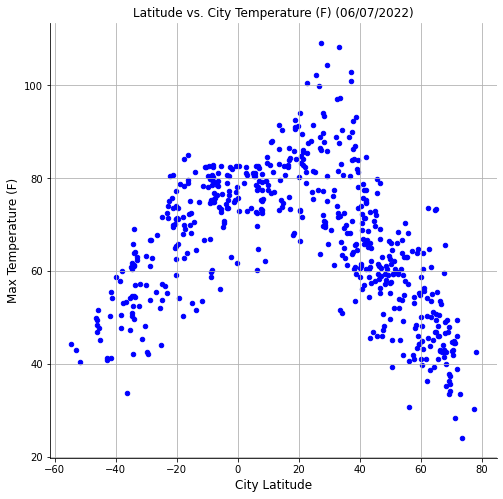

In [7]:
#Temperature (F) vs. Latitude - right now my data is in celcius, will have to re run 
from matplotlib.pylab import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

city_data.plot(kind="scatter", x="Lat", y="Max Temp", c = ['blue'], grid=True, figsize=(8,8),
              title= "Latitude vs. City Temperature (F) (06/07/2022)");
plt.ylabel('Max Temperature (F)', fontsize = 12);
plt.xlabel('City Latitude',fontsize = 12);
#save image to output_data and display on screen 
plt.savefig('output_data/Temperature_vs_Latitude')
plt.show()

This plot represents the relationship between a sample city's latitude and max temperature in fahrenheit

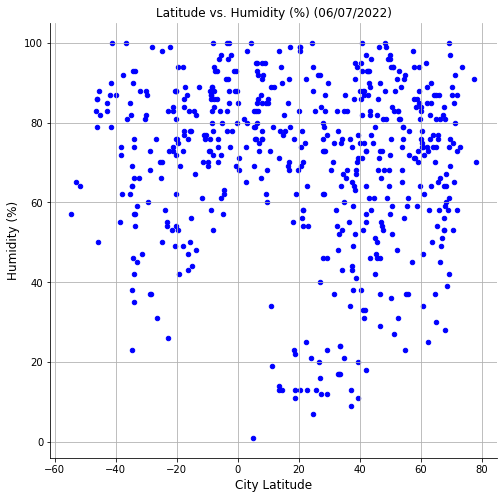

In [8]:
#Humidity (%) vs. Latitude
city_data.plot(kind="scatter", x="Lat", y="Humidity", c = ['blue'], grid=True, figsize=(8,8),
              title= "Latitude vs. Humidity (%) (06/07/2022)");
plt.ylabel("Humidity (%)",fontsize = 12);
plt.xlabel('City Latitude', fontsize = 12);
#save image to output_data and display on screen 
plt.savefig('output_data/Humidity_vs_Latitude')
plt.show()

This plot represents the relationship between a sample city's latitude and humidity percentage

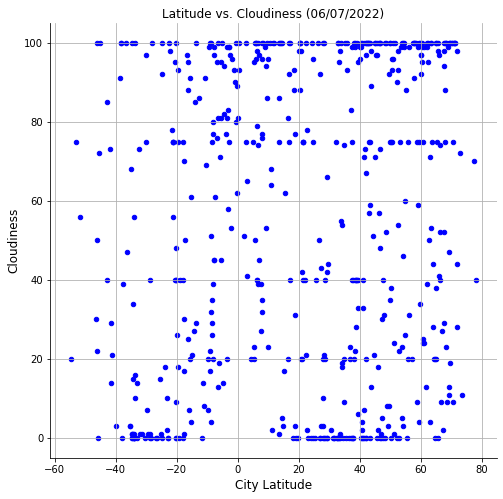

In [9]:
#Cloudiness (%) vs. Latitude
city_data.plot(kind="scatter", x="Lat", y="Cloudiness", c = ['blue'], grid=True, figsize=(8,8),
              title= "Latitude vs. Cloudiness (06/07/2022)");
plt.ylabel("Cloudiness",fontsize = 12);
plt.xlabel('City Latitude', fontsize = 12);
#save image to output_data and display on screen 
plt.savefig('output_data/Cloudiness_vs_Latitude')
plt.show()

This plot represents the relationship between a sample city's latitude and cloudiness

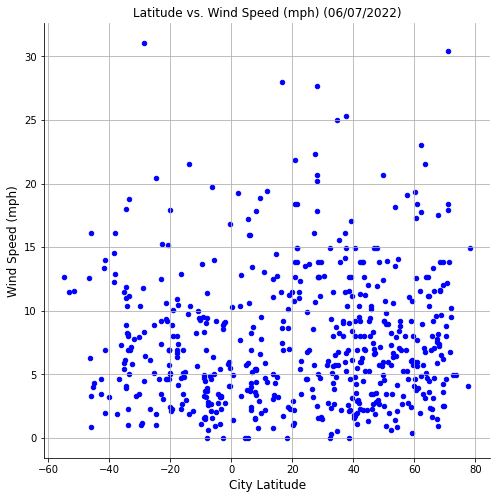

In [10]:
#Wind Speed (mph) vs. Latitude - should look different after changing to imperial (for mph)
city_data.plot(kind="scatter", x="Lat", y="Wind Speed", c = ['blue'], grid=True, figsize=(8,8),
              title= "Latitude vs. Wind Speed (mph) (06/07/2022)");
plt.ylabel("Wind Speed (mph)",fontsize = 12);
plt.xlabel('City Latitude',fontsize = 12);
#save image to output_data and display on screen 
plt.savefig('output_data/WindSpeed_vs_Latitude')
plt.show()

This plot represents the relationship between a sample city's latitude and wind speed in miles per hour

In [11]:
#compute the linear regression for each relationship. This time, 
#separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) 
#and Southern Hemisphere (less than 0 degrees latitude)
northern_hem = city_data.loc[city_data['Lat'] >= 0]
southern_hem = city_data.loc[city_data['Lat'] < 0]

The r-value is: 0.5765704967602173


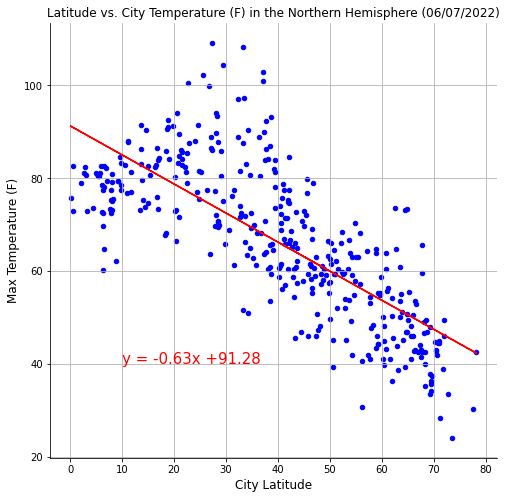

In [13]:
# Northern Hemisphere - Temperature (F) vs. Latitude
northern_hem.plot(kind="scatter", x="Lat", y="Max Temp", c = ['blue'], grid=True, figsize=(8,8),
              title= "Latitude vs. City Temperature (F) in the Northern Hemisphere (06/07/2022)");
plt.ylabel('Max Temperature (F)', fontsize = 12);
plt.xlabel('City Latitude',fontsize = 12);
x = northern_hem['Lat']
y = northern_hem['Max Temp']
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.plot(x,regress_values,"r-");
#save image to output_data and display on screen 
plt.savefig('output_data/Northernhem_temp_vs_latitude')
plt.show()

The r-value is: 0.5909110437441117


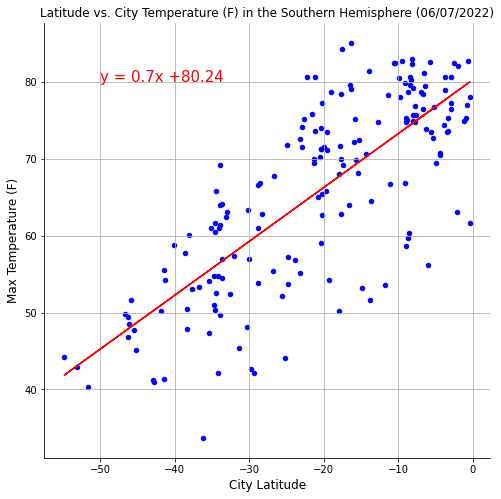

In [16]:
# Southern Hemisphere - Temperature (F) vs. Latitude
southern_hem.plot(kind="scatter", x="Lat", y="Max Temp", c = ['blue'], grid=True, figsize=(8,8),
              title= "Latitude vs. City Temperature (F) in the Southern Hemisphere (06/07/2022)");
plt.ylabel('Max Temperature (F)', fontsize = 12);
plt.xlabel('City Latitude',fontsize = 12);
x = southern_hem['Lat']
y = southern_hem['Max Temp']
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.plot(x,regress_values,"r-");
#save image to output_data and display on screen 
plt.savefig('output_data/Southernhem_temp_vs_latitude')
plt.show()

These two graphs above indicate that as one moves closer to the equator (latitude of zero), max temperature increases. We can be somewhat confident about this, as the R squared value for each graph indicates a moderately high (above 57% for both graphs) proportion of the variation in the max temperature (f) are predictable based on the city latitude.

The r-value is: 0.0004890407198225737


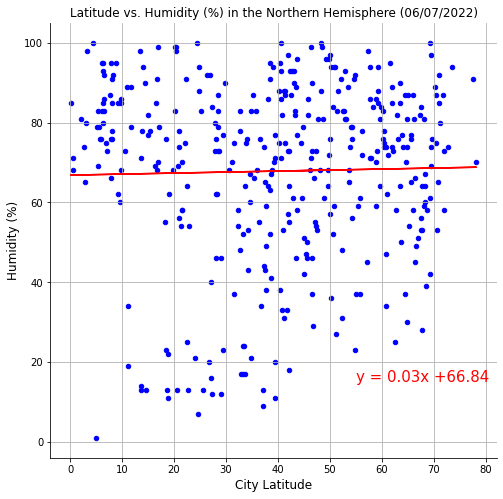

In [17]:
# Northern Hemisphere - Humidity (%) vs. Latitude
northern_hem.plot(kind="scatter", x="Lat", y="Humidity", c = ['blue'], grid=True, figsize=(8,8),
              title= "Latitude vs. Humidity (%) in the Northern Hemisphere (06/07/2022)");
plt.ylabel("Humidity (%)",fontsize = 12);
plt.xlabel('City Latitude', fontsize = 12);
x = northern_hem['Lat']
y = northern_hem['Humidity']
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(55,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.plot(x,regress_values,"r-");
#save image to output_data and display on screen 
plt.savefig('output_data/Northernhem_humidity_vs_latitude')
plt.show()

The r-value is: 0.04754899502596956


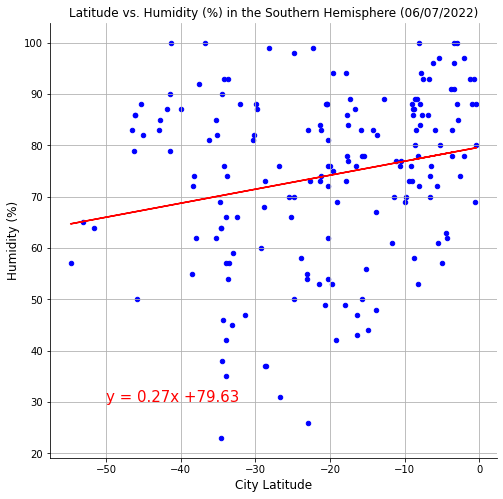

In [18]:
# Southern Hemisphere - Humidity (%) vs. Latitude
southern_hem.plot(kind="scatter", x="Lat", y="Humidity", c = ['blue'], grid=True, figsize=(8,8),
              title= "Latitude vs. Humidity (%) in the Southern Hemisphere (06/07/2022)");
plt.ylabel("Humidity (%)",fontsize = 12);
plt.xlabel('City Latitude', fontsize = 12);
x = southern_hem['Lat']
y = southern_hem['Humidity']
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.plot(x,regress_values,"r-");
#save image to output_data and display on screen 
plt.savefig('output_data/Southernhem_humidity_vs_latitude')
plt.show()

The two graphs above illustrate that there is not a considerable relationship between latitude and humidity, or in other words, that changes in latitude do not reliably predict changes in humidity levels. This is also illustrated by the low R squared value for each graph, regardless of hemisphere, with the northern hemisphere graph having an R squared value considerably less than 1%, and the southern hemisphere graph having an R squared value of a measly 4%. These low R squared values indicate little correlation between latitude and humidity. 

The r-value is: 0.00046732058832569656


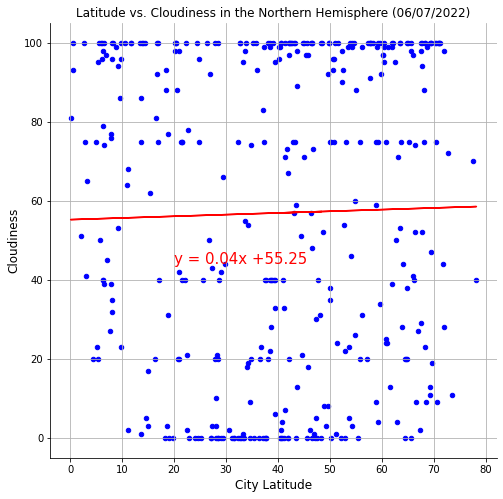

In [19]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
northern_hem.plot(kind="scatter", x="Lat", y="Cloudiness", c = ['blue'], grid=True, figsize=(8,8),
              title= "Latitude vs. Cloudiness in the Northern Hemisphere (06/07/2022)");
plt.ylabel("Cloudiness",fontsize = 12);
plt.xlabel('City Latitude', fontsize = 12);
x = northern_hem['Lat']
y = northern_hem['Cloudiness']
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,44),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.plot(x,regress_values,"r-");
#save image to output_data and display on screen 
plt.savefig('output_data/Northernhem_cloudiness_vs_latitude')
plt.show()

The r-value is: 0.08356995919696458


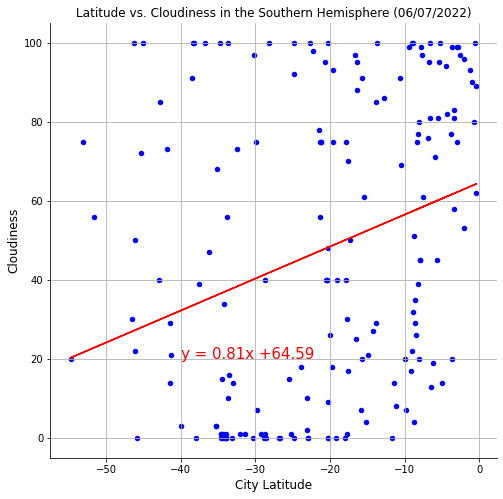

In [20]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
southern_hem.plot(kind="scatter", x="Lat", y="Cloudiness", c = ['blue'], grid=True, figsize=(8,8),
              title= "Latitude vs. Cloudiness in the Southern Hemisphere (06/07/2022)");
plt.ylabel("Cloudiness",fontsize = 12);
plt.xlabel('City Latitude', fontsize = 12);
x = southern_hem['Lat']
y = southern_hem['Cloudiness']
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.plot(x,regress_values,"r-");
#save image to output_data and display on screen 
plt.savefig('output_data/Southernhem_cloudiness_vs_latitude')
plt.show()

Visually, it seems apparent that city latitude and cloudiness do not have a relationship to eachother. Do not be fooled by the seemingly positive linear relationship displayed on the southern hemisphere graph, as it has an extremely low R squared value at 8%, meaning that only 8% of the proportion of the variation in cloudiness are predictable based on the city latitude in the southern hemisphere. The northern hemisphere R squared value is even lower, at 0.04%. Regardless of hemisphere or distance from equator, it seems very little to no variance in cloudiness is correlated to city latitude. 

The r-value is: 0.00025512322409751523


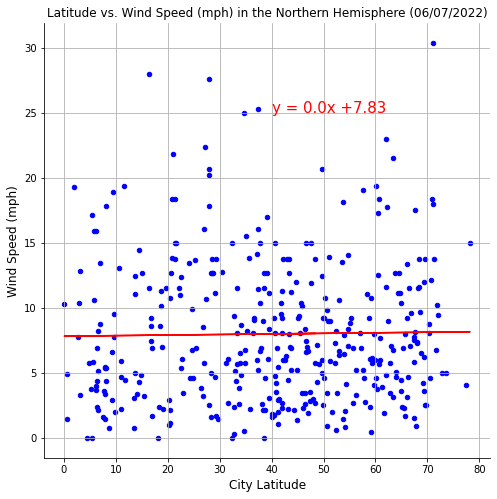

In [22]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
northern_hem.plot(kind="scatter", x="Lat", y="Wind Speed", c = ['blue'], grid=True, figsize=(8,8),
              title= "Latitude vs. Wind Speed (mph) in the Northern Hemisphere (06/07/2022)");
plt.ylabel("Wind Speed (mph)",fontsize = 12);
plt.xlabel('City Latitude',fontsize = 12);
x = northern_hem['Lat']
y = northern_hem['Wind Speed']
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.plot(x,regress_values,"r-");
#save image to output_data and display on screen 
plt.savefig('output_data/Northernhem_windspeed_vs_latitude')
plt.show()

The r-value is: 0.04863647671272603


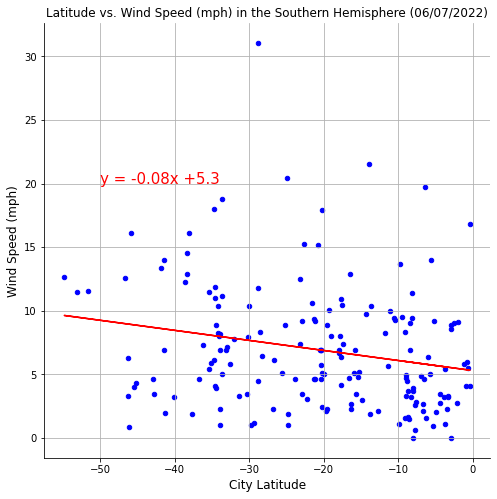

In [24]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
southern_hem.plot(kind="scatter", x="Lat", y="Wind Speed", c = ['blue'], grid=True, figsize=(8,8),
              title= "Latitude vs. Wind Speed (mph) in the Southern Hemisphere (06/07/2022)");
plt.ylabel("Wind Speed (mph)",fontsize = 12);
plt.xlabel('City Latitude',fontsize = 12);
x = southern_hem['Lat']
y = southern_hem['Wind Speed']
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.plot(x,regress_values,"r-");
#save image to output_data and display on screen 
plt.savefig('output_data/Southernhem_windspeed_vs_latitude')
plt.show()

Similar to the last graphs comparing cloudiness to city latitude, these two graphs above demostrating the relationship between wind speed and city latitude indicate that there is likely no correlation between these two variables. The R squared values are less than 1% for the northern hemisphere data and less than 4% for the southern hemisphere data, meaning that for both hemispheres the proportion of the variation in wind speed are not predictable based on the city latitude. 